In [ ]:
# The code was removed by DSX for sharing.

#                      Health Insurance Marketplace Dataset  Analysis




# Introduction

Analysis of the health insurance marketplace dataset from the U.S.The dataset consists of health insurance and dental plans offered through healthcare.gov between 2014 and 2016. It encompasses rates for smokers and non-smokers, separately listed for each age group, benefits included in the plans, states in which the plans were offered, and other information. The dataset does not contain any information on actual purchases. This notebook shows my first exploration of the dataset, a thorough data cleaning, and an analysis of the plan rates with respect to smokers and non-smokers, age groups and U.S. states.

# Goal for this Notebook:

This Notebook will show basic examples of:

$1$: Data Handling              
$2$:Importing Data with Pandas                                              
$3$: Cleaning Data                                                 
$4$: Data Analysis

Visulization:

$1$: Family Up Limit Analysis (KDE)      
$2$: Year Rate Analysis         
$3$: State Rate Analysis         
$4$: Plan Coverage Type              
Supervised Machine learning:

$1$: Logit Regression Model             
$2$: Predict Business Year and Individual Rate                    
$3$: Pridict States by Rate 

UnSupervised Machine learning:

$1$: Predict Metal Level By States

# Required Libraries

In [1]:
import pandas as pd
import csv as csv
import warnings
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
import math 
import mpld3
from ibmdbpy import IdaDataFrame
from sklearn import preprocessing
from sklearn import neighbors
import matplotlib
from ibmdbpy import IdaDataBase
import statsmodels.formula.api as smf
from pylab import rcParams
sns.set(style="ticks")
%matplotlib inline
matplotlib.style.use('ggplot')
rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'
warnings.filterwarnings('ignore')

/usr/local/src/bluemix_jupyter_bundle.v36/notebook/lib/python2.7/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/usr/local/src/bluemix_jupyter_bundle.v36/notebook/lib/python2.7/site-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/usr/local/src/bluemix_jupyter_bundle.v36/notebook/lib/python2.7/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/usr/local/src/bluemix_jupyter_bundle.v36/notebook/lib/python2.7/

# Data Handling

Let's read our data in using pandas:

### Load Data from Object Storage

In [2]:
import requests, StringIO, json

def get_file_content(credentials):
    """For given credentials, this functions returns a StringIO object containg the file content 
    from the associated Bluemix Object Storage V3."""

    url1 = ''.join([credentials['auth_url'], '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': credentials['username'],'domain': {'id': credentials['domain_id']},
            'password': credentials['password']}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                if(e2['interface']=='public'and e2['region']==credentials['region']):
                    url2 = ''.join([e2['url'],'/', credentials['container'], '/', credentials['filename']])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO.StringIO(resp2.content)

In [3]:
# The code was removed by DSX for sharing.

In [4]:
# The code was removed by DSX for sharing.

In [5]:
rate_raw = pd.read_csv(get_file_content(credentials_4))
rate_raw.head(3)

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15


In [6]:
planattribute_raw = pd.read_csv(get_file_content(credentials_3))
planattribute_raw.head(3)

,AVCalculatorOutputNumber,BeginPrimaryCareCostSharingAfterNumberOfVisits,BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays,BenefitPackageId,BusinessYear,CSRVariationType,ChildOnlyOffering,ChildOnlyPlanId,CompositeRatingOffered,DEHBCombInnOonFamilyMOOP,...,TEHBOutOfNetFamilyMOOP,TEHBOutOfNetFamilyPerGroupMOOP,TEHBOutOfNetFamilyPerPersonMOOP,TEHBOutOfNetIndividualMOOP,TIN,URLForEnrollmentPayment,URLForSummaryofBenefitsCoverage,UniquePlanDesign,VersionNum,WellnessProgramOffered
0,NaN,0,0,1,2014,Standard Low Off Exchange Plan,Allows Adult and Child-Only,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,93-0438772,https://www.modahealth.com/employers/enroll.shtml,https://www.modahealth.com/producers/grp/den.s...,NaN,6,NaN
1,NaN,0,0,1,2014,Standard Low On Exchange Plan,Allows Adult and Child-Only,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,93-0438772,https://www.modahealth.com/employers/enroll.shtml,https://www.modahealth.com/producers/grp/den.s...,NaN,6,NaN
2,NaN,0,0,1,2014,Standard High Off Exchange Plan,Allows Adult and Child-Only,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,93-0438772,https://www.modahealth.com/employers/enroll.shtml,https://www.modahealth.com/producers/grp/den.s...,NaN,6,NaN


##### Let's take a look:


In [9]:
planattribute_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77353 entries, 0 to 77352
Columns: 176 entries, AVCalculatorOutputNumber to WellnessProgramOffered
dtypes: float64(7), int64(9), object(160)
memory usage: 104.5+ MB


In [8]:
rate_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12694445 entries, 0 to 12694444
Data columns (total 24 columns):
BusinessYear                                 int64
StateCode                                    object
IssuerId                                     int64
SourceName                                   object
VersionNum                                   int64
ImportDate                                   object
IssuerId2                                    int64
FederalTIN                                   object
RateEffectiveDate                            object
RateExpirationDate                           object
PlanId                                       object
RatingAreaId                                 object
Tobacco                                      object
Age                                          object
IndividualRate                               float64
IndividualTobaccoRate                        float64
Couple                                       float64
Pr

# Data Cleaning

#### Rate File Cleaning

The Individual feature is important for us so we are deleteing all other Attributes. To handle this we will drop them from the dataframe to preserve the integrity of our dataset.

To do that we'll use this line of code to drop the features entirely:

In [57]:
rate_data=rate_raw[['BusinessYear','IssuerId','ImportDate','PlanId','Age','IndividualRate','Couple','CoupleAndOneDependent','CoupleAndTwoDependents','CoupleAndThreeOrMoreDependents','StateCode','Tobacco']]
rate_data.head(3)

,BusinessYear,IssuerId,ImportDate,PlanId,Age,IndividualRate,Couple,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,StateCode,Tobacco
0,2014,21989,2014-03-19 07:06:49,21989AK0010001,0-20,29.00,NaN,NaN,NaN,NaN,AK,No Preference
1,2014,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,73.9,144.56,144.56,144.56,AK,No Preference
2,2014,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,73.9,144.56,144.56,144.56,AK,No Preference


First we clear out the weird data (with rates over 9,000)

In [58]:
rate_data[rate_data.IndividualRate>9000].IndividualRate.unique() # weird data

array([ 999999.  ,    9999.  ,    9999.99])

In [59]:
rate_data = rate_data[rate_data.IndividualRate <9000]

We will focus on family option plans analysis, so we delete all the plans for special ages:

In [60]:
rate_df = rate_data[rate_data.Age == "Family Option"]
rate_df.head(3)

,BusinessYear,IssuerId,ImportDate,PlanId,Age,IndividualRate,Couple,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,StateCode,Tobacco
1,2014,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,73.9,144.56,144.56,144.56,AK,No Preference
2,2014,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,73.9,144.56,144.56,144.56,AK,No Preference
5,2014,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,73.9,144.56,144.56,144.56,AK,No Preference


While this line of code removes the NaN values from every remaining column / feature:

In [61]:
rate_df = rate_df.dropna()

In [62]:
rate_df['ImportDate']=rate_df['ImportDate'].apply(pd.to_datetime)

In [63]:
rate_df2=rate_df

#### Plan Atrribute Data Cleaning 

Again we only get important features for us so others we are deleteing all. To handle this we will drop them from the dataframe to preserve the integrity of our dataset.
To do that we'll use this line of code to drop the features entirely:

In [18]:
plan_data=planattribute_raw[['BusinessYear','StateCode','IssuerId','ImportDate','PlanId','MetalLevel',
                                        'TEHBInnTier1FamilyMOOP','TEHBInnTier1IndividualMOOP']]
plan_data.head(3)

,BusinessYear,StateCode,IssuerId,ImportDate,PlanId,MetalLevel,TEHBInnTier1FamilyMOOP,TEHBInnTier1IndividualMOOP
0,2014,AK,21989,2014-03-19 07:06:49,21989AK0020002-00,Low,NaN,NaN
1,2014,AK,21989,2014-03-19 07:06:49,21989AK0020002-01,Low,NaN,NaN
2,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001-00,High,NaN,NaN


There are some Nan in 'TEHBInnTier1FamilyMOOP' column. Is there anything else in this column?

Even some dollar icons and ','. We have to clean them:

In [19]:
plan_data['TEHBInnTier1FamilyMOOP']=plan_data['TEHBInnTier1FamilyMOOP'].str.replace('$','').str.replace(',','')
plan_data.head(3)

,BusinessYear,StateCode,IssuerId,ImportDate,PlanId,MetalLevel,TEHBInnTier1FamilyMOOP,TEHBInnTier1IndividualMOOP
0,2014,AK,21989,2014-03-19 07:06:49,21989AK0020002-00,Low,NaN,NaN
1,2014,AK,21989,2014-03-19 07:06:49,21989AK0020002-01,Low,NaN,NaN
2,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001-00,High,NaN,NaN


Delete all the 'Not Applicable' rows:

In [20]:
plan_data=plan_data.drop(plan_data[plan_data['TEHBInnTier1FamilyMOOP']=='Not Applicable'].index)

Delete all the NAN rows:

In [21]:
plan_data['TEHBInnTier1FamilyMOOP']=plan_data['TEHBInnTier1FamilyMOOP'].fillna(99999999)

In [22]:
plan_data=plan_data.drop(plan_data[plan_data['TEHBInnTier1FamilyMOOP']==99999999].index)

Convert Import date to pandas date time.

In [23]:
plan_data['ImportDate']=plan_data['ImportDate'].apply(pd.to_datetime)

 We are Changing the 'TEHBInnTier1FamilyMOOP' to 'Family_Up_Limit' for our better understanding.

In [24]:
plan_data['Family_Up_Limit']=''
for x in plan_data.index:
    plan_data.ix[x,"Family_Up_Limit"]=float(plan_data.ix[x,'TEHBInnTier1FamilyMOOP'])
plan_data['Family_Up_Limit']=plan_data['Family_Up_Limit'].astype(int) # Transfer object to int

We are also Changing the 'TEHBInnTier1IndividualMOOP' to 'Individual_Up_Limit' for better understanding

In [25]:
plan_data['TEHBInnTier1IndividualMOOP']=plan_data['TEHBInnTier1IndividualMOOP'].str.replace('$','').str.replace(',','')
plan_data['Individual_Up_Limit']=''
for x in plan_data.index:
    plan_data.ix[x,"Individual_Up_Limit"]=float(plan_data.ix[x,'TEHBInnTier1IndividualMOOP'])
plan_data['Individual_Up_Limit']=plan_data['Individual_Up_Limit'].astype(int) # Transfer object to int
plan_data.head(3)

,BusinessYear,StateCode,IssuerId,ImportDate,PlanId,MetalLevel,TEHBInnTier1FamilyMOOP,TEHBInnTier1IndividualMOOP,Family_Up_Limit,Individual_Up_Limit
6,2014,AK,73836,2014-04-18 11:49:29,73836AK0650002-00,Bronze,12700,6350,12700,6350
7,2014,AK,73836,2014-04-18 11:49:29,73836AK0680004-00,Gold,8000,4000,8000,4000
8,2014,AK,73836,2014-04-18 11:49:29,73836AK0680004-01,Gold,8000,4000,8000,4000


Drop the useless columns like 'TEHBInnTier1IndividualMOOP','TEHBInnTier1FamilyMOOP'

In [26]:
plan_df=plan_data.drop(plan_data[[6,7]],1)
plan_df.head(3)

,BusinessYear,StateCode,IssuerId,ImportDate,PlanId,MetalLevel,Family_Up_Limit,Individual_Up_Limit
6,2014,AK,73836,2014-04-18 11:49:29,73836AK0650002-00,Bronze,12700,6350
7,2014,AK,73836,2014-04-18 11:49:29,73836AK0680004-00,Gold,8000,4000
8,2014,AK,73836,2014-04-18 11:49:29,73836AK0680004-01,Gold,8000,4000


In [27]:
plan_df3=plan_df
plan_df5=planattribute_raw[['PlanId','IssuerId','BusinessYear','DentalOnlyPlan','IsNewPlan','OutOfCountryCoverage','NationalNetwork']]
plan_df5 = plan_df5.dropna()

In [28]:
train_df = plan_df5[1:70000]
test_df = plan_df5[70001:77353]

In [29]:
test_df=test_df.drop(['DentalOnlyPlan'], axis=1)
train_df=train_df.drop(['PlanId'], axis=1)

Conversion of age from a factor to a numeric variable: IsNewPlan,DentalOnlyPlan,OutOfCountryCoverage,NationalNetwork attributes belonging to PlanAttribute.csv is filtered as follows: –
Records with age value “Yes” is converted to numeric value 1                  
Records with age value “No“ are converted into numeric value 0                    
Records with age value “New“ are converted into numeric value 1              
Records with age value “Existing“ are converted into numeric value 0                     

In [30]:
mapping = {'Yes':1,'No':0}
mapping1={'New':1,'Existing':0}
value=0
train_df['PlanType'] = train_df['DentalOnlyPlan'].map(mapping).astype(int)
train_df['NewPlan'] = train_df['IsNewPlan'].map(mapping1).astype(int)
test_df['NewPlan'] = test_df['IsNewPlan'].map(mapping1).astype(int)
train_df['CountryCoverage'] = train_df['OutOfCountryCoverage'].map(mapping).fillna(value).astype(int)
test_df['CountryCoverage'] = test_df['OutOfCountryCoverage'].map(mapping).fillna(value).astype(int)
train_df['NetworkType'] = train_df['NationalNetwork'].map(mapping).fillna(value).astype(int)
test_df['NetworkType'] = test_df['NationalNetwork'].map(mapping).fillna(value).astype(int)

train_df=train_df.drop(['DentalOnlyPlan','IsNewPlan','OutOfCountryCoverage','NationalNetwork'], axis=1)
test_df=test_df.drop(['IsNewPlan','OutOfCountryCoverage','NationalNetwork'], axis=1)

# Visualization

#### Family Up Limit Analysis (KDE)

If we have a family health insurance, we really should care about the family out-of-pocket cost limit for medical and drug EHB benefits. We can use KDE to watch these limits clearly

(0, 13500)

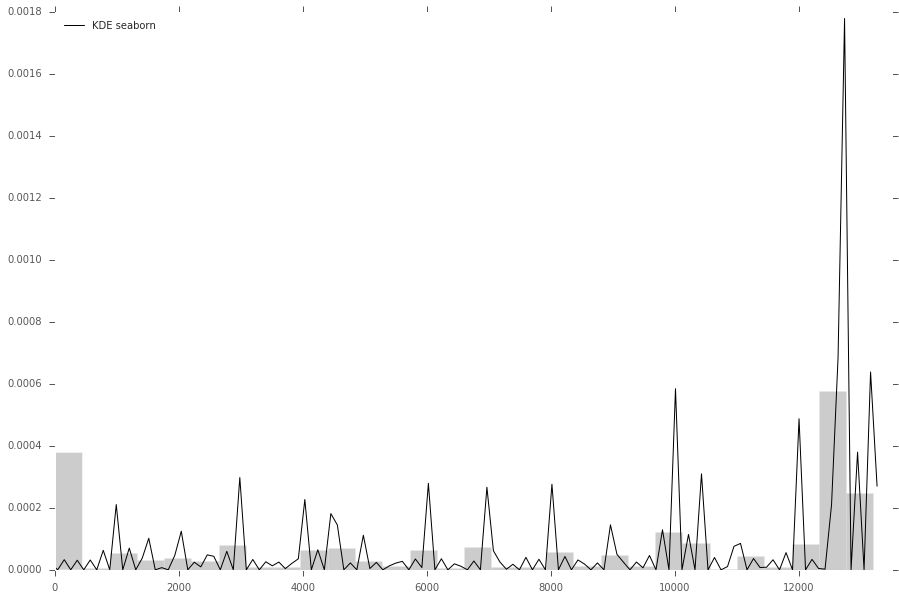

In [31]:
fig, ax = plt.subplots(figsize=(15,10))
plan_df.Family_Up_Limit.hist(bins=30, normed=True, alpha=0.4, color='grey')
sns.kdeplot(plan_df.Family_Up_Limit, bw=20, color='black', lw=1.0, label='KDE seaborn')
plt.xlim([0,13500])

As the KDE chart shows, lots of plan limits are 0, that means these plans are for the poor people who need help. And we can find that most limits are more than 12000, that means the U.S. insurance issurers like focusing on high-end plan products. Maybe that's why Americans usually spend loads of money on their health insurance.

#### Year Rate Analysis

These value will get from import date

In [32]:
date_object1 = pd.to_datetime(plan_df['ImportDate'])
plan_df1=plan_df
plan_df1['weekday'] = date_object1.dt.dayofweek
plan_df1['month'] = date_object1.dt.month
plan_df1['year'] = date_object1.dt.year
plan_df1['hour'] = date_object1.dt.hour
plan_df1['minute'] = date_object1.dt.minute
plan_df1['second'] = date_object1.dt.second

Now we use "groupby" to get the median values by year:

(<matplotlib.text.Text at 0x7fa36c5948d0>,
 <matplotlib.legend.Legend at 0x7fa39c1e2250>)

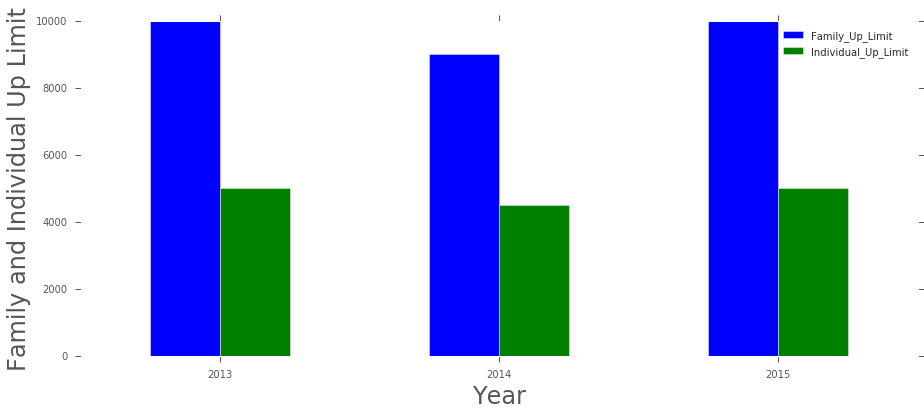

In [33]:
p = plan_df1.groupby('year').median()[["Family_Up_Limit", "Individual_Up_Limit"]].plot(kind = 'bar', figsize = (15, 6), rot = 0)
p.set_xlabel("Year"), p.set_ylabel("Family and Individual Up Limit"), p.legend(["Family_Up_Limit", "Individual_Up_Limit"])

#### State Rate Analysis

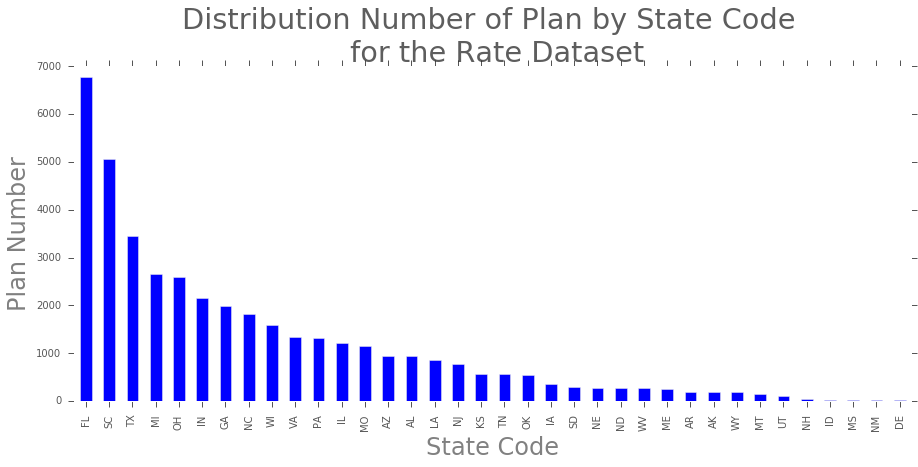

In [34]:
Plans_grouped = rate_df['PlanId'].groupby(rate_df['StateCode'])
Plans_grouped.count().order(ascending=False).plot(kind='bar',figsize = (15, 6))
plt.ylabel('Plan Number', alpha=0.75)
plt.xlabel('State Code', alpha=0.75)
plt.title('Distribution Number of Plan by State Code \n for the Rate Dataset', alpha=0.75)

The graph above shows the states where the plan offered. As It can be seen, there are fewer plan choices in DE, AK and MS states. The FL uses the plan more than the other states, so you can find the rates in this state are much cheaper. You can find why the competition is very important in the health insurance market.


#### Plan Coverage Type

In [35]:
df_plan1=plan_df.groupby(['MetalLevel'], as_index=False)['PlanId'].count()

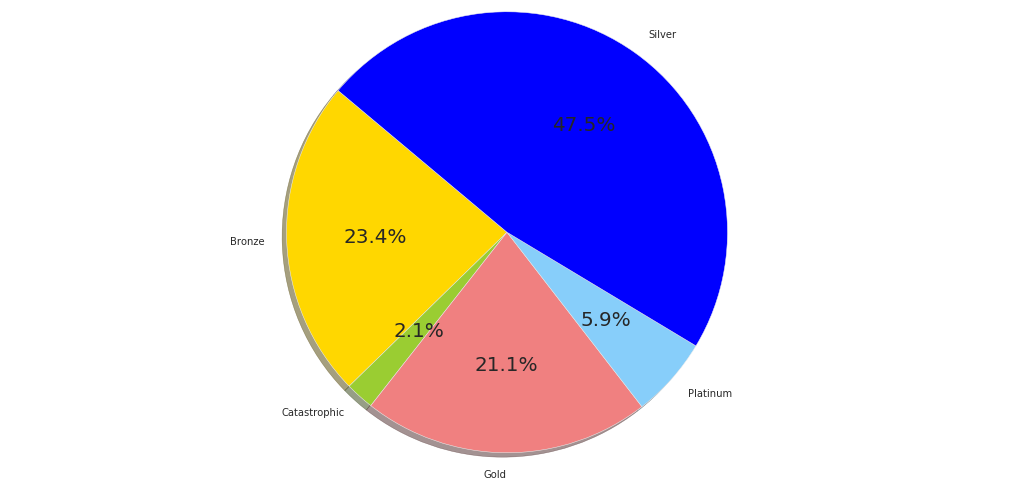

In [36]:
labels = df_plan1['MetalLevel']
sizes = df_plan1['PlanId']
plt.figure(figsize=(18, 8))
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','blue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()


Bronze Plan: You pay 40% and the plan pays 60%.                              
Silver Plan: You pay 30% and the plan pays 70%.                                  
Gold Plan: You pay 20% and the plan pays 80%.                                            
Platinum Plan: You pay 10% and the plan pays 90%.                            
Catastrophic Plan: You pay 100% of a set amount of money called the deductible before the plan's coverage kicks in. Three primary care visits per year and preventive services are covered for free before you meet the deductible.

# Machine Learning

## Supervised Learning

### 1. Insurance Plan Type Prediction

Here We will run multiple model to predict the health Plan that will be a dental or full health plan.

In [104]:
# Copy df across and drop PlanType
x = train_df
X_train = x.drop('PlanType', axis=1)
# Set y as the PlanType column, we need
# to wrap it in the dataframe to stop it
# being series 
X_test=test_df.drop('PlanId',axis=1)
y_train = pd.DataFrame(train_df.PlanType)

#### Logistic Regression

In [105]:
logreg = LogisticRegression()
result=logreg.fit(X_train, y_train)
score_logreg = logreg.score(X_train, y_train)
LR_pred = logreg.predict(X_test)
print ("Logistic Regression Score: %f",score_logreg)

('Logistic Regression Score: %f', 0.85022643180616864)


#### Random Forest Classifier

In [106]:
rfc = RandomForestClassifier(n_estimators=100)  
rfc.fit(X_train, y_train)
score_rfc = rfc.score(X_train, y_train)
RFC_pred = rfc.predict(X_test)
print ("Random Forest Classifier Score: %f", score_rfc)

('Random Forest Classifier Score: %f', 0.99322847469249564)


#### Support Vector Machines

In [107]:
svc = SVC()
svc.fit(X_train, y_train)
score_svc = svc.score(X_train, y_train)
SVC_pred = svc.predict(X_test)    
print ("SVM score: %f", score_svc)

('SVM score: %f', 0.99281418305975799)


#### K Neighbors Classifier

In [108]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
score_knn = knn.score(X_train, y_train)
KNC_pred = knn.predict(X_test)
print ("knn score: %f", score_knn)

('knn score: %f', 0.99064272346747806)


#### Gaussian Naive Bayes

In [109]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
GNB_pred = gaussian.predict(X_test)
score_gaussion=gaussian.score(X_train, y_train)
print ("Gaussian Naive Bayes Score: %f", score_gaussion)

('Gaussian Naive Bayes Score: %f', 0.85022643180616864)


### Predicted Dataframe

Random Calssifier have highest score so we will use this model for prediction

In [112]:
submission_df = pd.DataFrame({
        "PlanId": test_df["PlanId"],
        "DentalOnlyPlan": RFC_pred
    })
mapping = {1:'Dental Plan',0:'Full Health Plan'}
submission_df['PlanType'] = submission_df['DentalOnlyPlan'].map(mapping).astype(str)
submission_df=submission_df.drop(['DentalOnlyPlan'], axis=1)
submission_df.head(100)

,PlanId,PlanType
70001,33653ME0110001-01,Full Health Plan
70002,33653ME0050001-01,Full Health Plan
70003,33653ME0050001-02,Full Health Plan
70004,33653ME0050002-05,Full Health Plan
70005,33653ME0050002-06,Full Health Plan
70006,33653ME0050003-00,Full Health Plan
70007,33653ME0050003-01,Full Health Plan
70008,33653ME0050003-02,Full Health Plan
70009,33653ME0050003-03,Full Health Plan
70010,33653ME0050003-04,Full Health Plan


### 2. Predict Plan Types by BusinessYear and Fimily,Individual Limits

Different target costomer plans are issued at different time. Can we predict which month should the plan be issued in the fixed business year? Yes, we can use kNN to make it.                                     


We selected IndividualRate and BusinessYear as predictors and State as target/response variable. Then I started testing the dataset with regression algorithm of KNN . After that I will evaluate the acuracy to see which one is the best.

In [96]:
X = plan_df[[0,6,7]]
y = plan_df.MetalLevel

#### Cross Validation

In [97]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.4)

print X_train.shape
print X_test.shape

print y_train.shape
print y_test.shape

(24518, 3)
(16346, 3)
(24518,)
(16346,)


In [98]:
rfc = RandomForestClassifier(n_estimators=100)  
rfc.fit(X_train, y_train)
score_rfc = rfc.score(X_train, y_train)
RFC_pred = rfc.predict(X_test)
print ("Random Forest Classifier Score: %f", score_rfc)

('Random Forest Classifier Score: %f', 0.57765723142181258)


In [99]:
svc = SVC()
svc.fit(X_train, y_train)
score_svc = svc.score(X_train, y_train)
SVC_pred = svc.predict(X_test)    
print ("SVM score: %f", score_svc)

('SVM score: %f', 0.57749408597764906)


In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn.fit(X_train, y_train)
score_knn=knn.score(X_test, y_test)
knn_pred = knn.predict(X_test)
print ("SVM score: %f", score_knn)

('SVM score: %f', 0.50428239324605406)


In [101]:
# Make point predictions on the test set using the fit model.
RFC_pred

array(['Platinum', 'Silver', 'Bronze', ..., 'Bronze', 'Silver', 'Platinum'], dtype=object)

In [102]:
from sklearn import metrics
print metrics.classification_report(y_test, RFC_pred)

             precision    recall  f1-score   support

     Bronze       0.48      0.54      0.51      3821
Catastrophic       0.00      0.00      0.00       370
       Gold       0.68      0.42      0.52      3411
   Platinum       0.51      0.53      0.52       929
     Silver       0.59      0.68      0.63      7815

avg / total       0.57      0.57      0.56     16346



 The model predict better on March with 0.67 accuracy. However, it predicts worse on November and October

### 3. Classification of States by Rates (Classification)

The rates of plans are different for different State. If we have a plan with five rates, can we predict which state is it most probably for?

First, import GaussianNB:

In [52]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [56]:
rate_df2=rate_df
rate_df2

,BusinessYear,IssuerId,ImportDate,PlanId,Age,IndividualRate,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,StateCode,Tobacco
1,2014,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,144.56,144.56,144.56,AK,No Preference
2,2014,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,144.56,144.56,144.56,AK,No Preference
5,2014,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,144.56,144.56,144.56,AK,No Preference
6,2014,21989,2014-03-19 07:06:49,21989AK0020002,Family Option,32.45,126.95,126.95,126.95,AK,No Preference
9,2014,21989,2014-03-19 07:06:49,21989AK0020002,Family Option,32.45,126.95,126.95,126.95,AK,No Preference
10,2014,21989,2014-03-19 07:06:49,21989AK0020002,Family Option,32.45,126.95,126.95,126.95,AK,No Preference
558,2014,42507,2013-09-02 11:39:25,42507AK0030001,Family Option,59.26,177.70,236.75,325.34,AK,No Preference
561,2014,42507,2013-09-02 11:39:25,42507AK0030001,Family Option,59.26,177.70,236.75,325.34,AK,No Preference
562,2014,42507,2013-09-02 11:39:25,42507AK0030001,Family Option,59.26,177.70,236.75,325.34,AK,No Preference
565,2014,42507,2013-09-02 11:39:25,42507AK0040001,Family Option,59.26,171.82,225.00,304.77,AK,No Preference


We can train a Naive Bayes classifier on all our training data as follows and use the model for prediction:

In [64]:
classifier = nb.fit(rate_df2[['IndividualRate', 'Couple', 'CoupleAndOneDependent', 'CoupleAndTwoDependents', 
                        'CoupleAndThreeOrMoreDependents']], rate_df2['StateCode'])
classifier

GaussianNB()

We can find out how well our classifier learned the training dataset based on overall accuracy:

In [65]:
classifier.score(rate_df2[['IndividualRate', 'Couple', 'CoupleAndOneDependent', 'CoupleAndTwoDependents', 
                        'CoupleAndThreeOrMoreDependents']], rate_df2['StateCode'])

0.15082679954080261

rates Group by State 

In [66]:
StateMedRate = rate_df2.groupby('StateCode').median()
StateMedRate = StateMedRate.drop(StateMedRate[[0,1]],1)
StateMedRate.head(3)

,IndividualRate,Couple,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
StateCode,,,,,
AK,45.39,78.730,132.705,154.925,160.49
AL,25.70,37.985,58.445,77.865,105.05
AR,27.02,49.465,75.230,98.720,128.11


Now we can use the classifier to classifier the state samples. First, the median rate values of the best state FL:

#### Cross Validation

In [67]:
StateMedRate.ix['FL', :5]

IndividualRate                    24.19
Couple                            30.45
CoupleAndOneDependent             46.36
CoupleAndTwoDependents            49.75
CoupleAndThreeOrMoreDependents    53.44
Name: FL, dtype: float64

In [68]:
StateMedRate['Predicted State']=''
StateMedRate.ix['FL', 'Predicted State']=classifier.predict([StateMedRate.ix['FL','IndividualRate'], 
                                                              StateMedRate.ix['FL','Couple'], 
                                                              StateMedRate.ix['FL','CoupleAndOneDependent'], 
                                                              StateMedRate.ix['FL','CoupleAndTwoDependents'], 
                                                              StateMedRate.ix['FL','CoupleAndThreeOrMoreDependents']])[0]
print "This plan should be for", StateMedRate.ix['FL', 'Predicted State'], "State!"

This plan should be for FL State!


Good! We get the "FL" result. Then we can try the worst state NM:

In [69]:
StateMedRate.ix['NM', :5]

IndividualRate                       31.7
Couple                               63.4
CoupleAndOneDependent               86.31
CoupleAndTwoDependents             108.41
CoupleAndThreeOrMoreDependents    140.375
Name: NM, dtype: object

In [70]:
StateMedRate.ix['NM', 'Predicted State']=classifier.predict([StateMedRate.ix['NM','IndividualRate'], 
                                                              StateMedRate.ix['NM','Couple'], 
                                                              StateMedRate.ix['NM','CoupleAndOneDependent'], 
                                                              StateMedRate.ix['NM','CoupleAndTwoDependents'], 
                                                              StateMedRate.ix['NM','CoupleAndThreeOrMoreDependents']])[0]
print "This plan should be for", StateMedRate.ix['NM', 'Predicted State'], "State!"

This plan should be for NM State!


The result is "NM"! So our Predictive model is good.

## Unsupervised Learning

### 1. Predict Matel Level by Rates (Clustering with k-Means)

There are five kind of metal level for the insurance plans. Though we don't know the exactly standard to classify them, we can use k-means to make it:

In [71]:
plan_df1=plan_df
plan_df1.head()

,BusinessYear,StateCode,IssuerId,ImportDate,PlanId,MetalLevel,Family_Up_Limit,Individual_Up_Limit,weekday,month,year,hour,minute,second
6,2014,AK,73836,2014-04-18 11:49:29,73836AK0650002-00,Bronze,12700,6350,4,4,2014,11,49,29
7,2014,AK,73836,2014-04-18 11:49:29,73836AK0680004-00,Gold,8000,4000,4,4,2014,11,49,29
8,2014,AK,73836,2014-04-18 11:49:29,73836AK0680004-01,Gold,8000,4000,4,4,2014,11,49,29
9,2014,AK,73836,2014-04-18 11:49:29,73836AK0650002-01,Bronze,12700,6350,4,4,2014,11,49,29
10,2014,AK,73836,2014-04-18 11:49:29,73836AK0650002-02,Bronze,0,0,4,4,2014,11,49,29


Prepare the dataset:

In [72]:
plan_df3 = plan_df3[[1,2,6,7]].groupby('StateCode').mean()
plan_df3.head()

,IssuerId,Family_Up_Limit,Individual_Up_Limit
StateCode,,,
AK,56779.165049,8584.223301,4291.747573
AL,51594.478992,7697.058824,3848.529412
AR,65296.025078,7918.043887,3959.021944
AZ,70779.807143,7868.875000,3935.129464
DE,66812.763948,7089.270386,3544.635193


In [73]:
minmax_scale = preprocessing.StandardScaler().fit(plan_df3)
plan_df3[['IssuerId','Family_Up_Limit','Individual_Up_Limit']] = minmax_scale.transform(plan_df3[['IssuerId','Family_Up_Limit','Individual_Up_Limit']])

km = KMeans(n_clusters=5, init='random')
km.fit(plan_df3)

KMeans(copy_x=True, init='random', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [74]:
predictions = km.predict(plan_df3)
predictions

array([0, 2, 3, 3, 2, 1, 3, 1, 0, 0, 3, 2, 2, 1, 2, 1, 3, 1, 1, 0, 1, 3, 2,
       3, 0, 1, 3, 3, 2, 1, 4, 4, 0, 2, 0, 2, 4, 0], dtype=int32)

We can get the result easily by 3D plot:

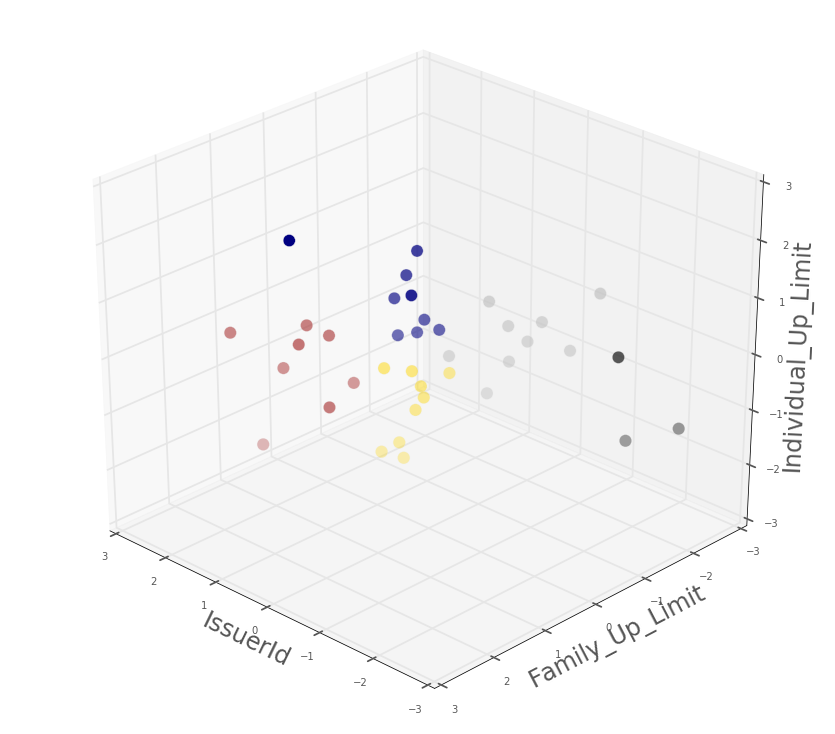

In [75]:
from mpl_toolkits.mplot3d import Axes3D
colors = np.array(['brown', 'gold','silver','navy','black'])

ax = Axes3D(plt.figure(figsize=(12, 10)), rect=[.01, 0, 0.95, 1], elev=30, azim=134)
ax.scatter(plan_df3.ix[:,'Individual_Up_Limit'], plan_df3.ix[:,'Family_Up_Limit'], 
           plan_df3.ix[:,'IssuerId'], c = colors[predictions], s=150)
ax.set_xlabel(plan_df3.columns[0])
ax.set_ylabel(plan_df3.columns[1])
ax.set_zlabel(plan_df3.columns[2])

# Conclusion

#  After data Cleaning, we tried to analyse the dataset and predicted some problems. And we found some useful conclusion:
### 1. We used KDE to find the distribution of family out-of-pocket cost limits .
### 2. We analysed Business Year data by GROUPBY, then found that there is no big price fluctuation in U.S. insurance market in there three years.
### 3. We analysed the state rates, and found that there are fewer plan choices in DE, AK and MS states, the rates of which are much more expensive. You can find why the competition is very important in the health insurance market.
### 4. We analysed the plan Coverage Type using Metal level.
### 5. We also analysed networks types that provided by Fedral Health Plan.
### 6. We predicted Plan Types by using family up limits and individual limit.
### 7. We used Naive Bayes and Cluster Modelling to predict State by Rates.
### 8. We used Cluster Modelling to accurately cluster the virsual plans into distinct groups that describe Matel Level without using exact level standard.

# Thnak you!